In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from LSTM import LSTM

model = LSTM(emb_dim = 1)

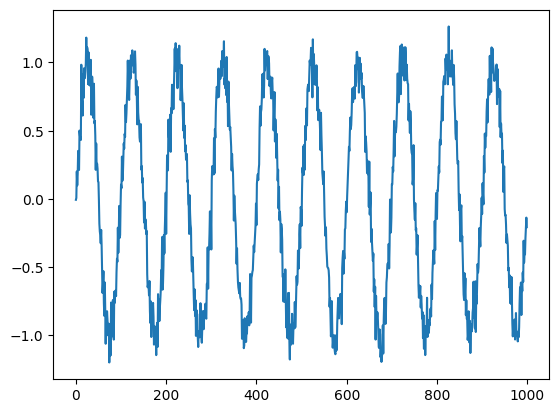

In [7]:
n_points = 1000
amplitude = 1
frequency = 0.01  # Low frequency = longer cycles
noise_level = 0.1  # Low noise
time = np.arange(n_points)

values = amplitude * np.sin(2 * np.pi * frequency * time) + np.random.normal(0, noise_level, n_points)

plt.plot(values);

In [8]:
from torch.utils.data import DataLoader, TensorDataset

def create_lstm_batches(data, sequence_length):
    X = []
    Y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        Y.append(data[i + sequence_length])
    return np.array(X), np.array(Y)

sequence_length = 7

X, Y = create_lstm_batches(values, sequence_length)

dataset = TensorDataset(
    torch.tensor(X, dtype=torch.float32).unsqueeze(-1),
    torch.tensor(Y, dtype=torch.float32).unsqueeze(-1)
)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [9]:
model = LSTM(emb_dim=1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

num_epochs = 20
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for X, y in loader:
        optimizer.zero_grad()
        out = model(X)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {avg_loss:.6f}")

Epoch 1/20 - Loss: 0.077567
Epoch 2/20 - Loss: 0.024342
Epoch 3/20 - Loss: 0.022424
Epoch 4/20 - Loss: 0.021324
Epoch 5/20 - Loss: 0.023422
Epoch 6/20 - Loss: 0.023510
Epoch 7/20 - Loss: 0.023620
Epoch 8/20 - Loss: 0.022751
Epoch 9/20 - Loss: 0.023045
Epoch 10/20 - Loss: 0.023557
Epoch 11/20 - Loss: 0.024923
Epoch 12/20 - Loss: 0.021309
Epoch 13/20 - Loss: 0.021951
Epoch 14/20 - Loss: 0.020895
Epoch 15/20 - Loss: 0.020604
Epoch 16/20 - Loss: 0.021073
Epoch 17/20 - Loss: 0.021119
Epoch 18/20 - Loss: 0.020794
Epoch 19/20 - Loss: 0.020673
Epoch 20/20 - Loss: 0.020497


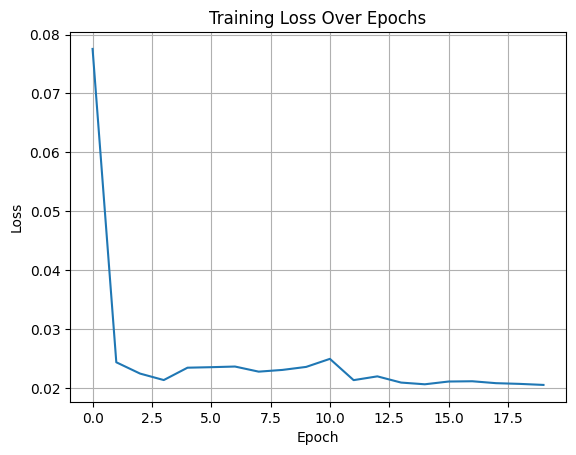

In [10]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()